In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
file = open('/content/drive/MyDrive/Colab Notebooks/LikeLion X Socar/data/regression_data.txt','r')  # open the file with read-only
text = file.readlines()  # read all line texts
file.close()  # close the file

x_data = []
y_data = []

# convert to float
for idx,s in enumerate(text):
    if idx%10==0:
      data = s.split()
      x_data.append(float(data[0]))
      y_data.append(float(data[1]))    

# convert to numpy-array
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

print("shape of input data: ", x_data.shape)
print("shape of output data: ", y_data.shape)

shape of input data:  (10,)
shape of output data:  (10,)


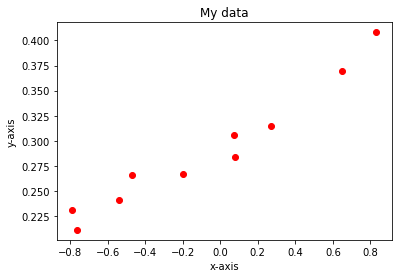

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)
plt.plot(x_data, y_data, 'ro') # plot data

plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('My data')

plt.show()

In [14]:
import torch
import torch.nn as nn
import numpy as np

In [15]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1
K=5

In [16]:
if len(x_data.shape)==1 and len(y_data.shape)==1:
  x_data = np.expand_dims(x_data, axis=-1)
  y_data = np.expand_dims(y_data, axis=-1)
print(x_data.shape, y_data.shape)

(10, 1) (10, 1)


In [18]:
validation_error_arr = []

for k in range(K):
  # Linear regression model, y = Wx+b
  model = nn.Linear(input_size, output_size)
  # Loss and optimizer
  criterion = nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  x_train = np.concatenate((x_data[:k*(len(x_data)//K),:],x_data[(k+1)*(len(x_data)//K):,:]), axis=0)
  y_train = np.concatenate((y_data[:k*(len(x_data)//K),:],y_data[(k+1)*(len(x_data)//K):,:]), axis=0)

  x_valid = x_data[k*(len(x_data)//K):(k+1)*(len(x_data)//K), :]
  y_valid = y_data[k*(len(x_data)//K):(k+1)*(len(x_data)//K), :]

  for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Predict outputs with the linear model.
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # compute gradients and update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    ve = loss.item()
    if (epoch+1) % 10 == 0:
      print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, ve))
    
    inputs = torch.from_numpy(x_valid)
    targets = torch.from_numpy(y_valid)
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    print(k+1,"validation error: ",ve)
    validation_error_arr.append(ve)

validation_error_arr = np.asarray(validation_error_arr)
print("Final validation error: ", validation_error_arr.mean())

1 validation error:  0.2115216851234436
1 validation error:  0.1558522880077362
1 validation error:  0.11758067458868027
1 validation error:  0.09075948596000671
1 validation error:  0.07155483216047287
1 validation error:  0.05748356133699417
1 validation error:  0.046927616000175476
1 validation error:  0.038824185729026794
1 validation error:  0.03246815875172615
Epoch [10/100], Loss: 0.0274
1 validation error:  0.027385789901018143
1 validation error:  0.0232539065182209
1 validation error:  0.019848007708787918
1 validation error:  0.01700892671942711
1 validation error:  0.014621236361563206
1 validation error:  0.01259925402700901
1 validation error:  0.010877872817218304
1 validation error:  0.009406492114067078
1 validation error:  0.008144986815750599
1 validation error:  0.007060965523123741
Epoch [20/100], Loss: 0.0061
1 validation error:  0.006127885077148676
1 validation error:  0.005323716904968023
1 validation error:  0.004630008712410927
1 validation error:  0.00403117